# データの読み込み


In [19]:
# 必要なライブラリをインポート
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [20]:
high_df = pd.read_csv('../../data/results/combined/Biochemistry_Molecular_Biology_high1000.csv')
low_df = pd.read_csv('../../data/results/combined/Biochemistry_Molecular_Biology_low1000.csv')

In [21]:
# 対象となるルールを抽出（rule1 ~ rule31）
rules = [f'rule{i}' for i in range(1, 32)]

# 結果を格納するリスト
results = []

# 各ルールについてZ検定を実行
for rule in rules:
    # yesの数をカウント
    high_yes = (high_df[rule] == 'yes').sum()
    low_yes = (low_df[rule] == 'yes').sum()

    # サンプルサイズを取得
    high_total = len(high_df)
    low_total = len(low_df)

    # Z検定の実行
    count = [high_yes, low_yes]  # 成功回数
    nobs = [high_total, low_total]  # サンプルサイズ

    stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

    # 結果をリストに追加
    results.append({'Rule': rule, 'Z-statistic': stat, 'P-value': p_value})
    
# 結果をデータフレームに変換
results_df = pd.DataFrame(results)

# 検定結果を出力
print(results_df)

      Rule  Z-statistic       P-value
0    rule1     7.034230  2.003648e-12
1    rule2     9.897870  4.252366e-23
2    rule3    -3.423916  6.172565e-04
3    rule4     6.529371  6.604659e-11
4    rule5     1.704705  8.824955e-02
5    rule6     1.093652  2.741076e-01
6    rule7     0.745020  4.562594e-01
7    rule8    10.558853  4.622739e-26
8    rule9    -8.186994  2.678326e-16
9   rule10    -3.699043  2.164138e-04
10  rule11     6.092812  1.109444e-09
11  rule12    -3.308691  9.373322e-04
12  rule13     4.166846  3.088429e-05
13  rule14    -7.513531  5.755362e-14
14  rule15    -5.370827  7.837653e-08
15  rule16    -4.713185  2.438742e-06
16  rule17    -1.164544  2.442037e-01
17  rule18    -2.033404  4.201175e-02
18  rule19    12.066990  1.578004e-33
19  rule20   -10.674556  1.338956e-26
20  rule21   -10.205333  1.876766e-24
21  rule22   -10.665641  1.473796e-26
22  rule23    -3.496988  4.705438e-04
23  rule24     0.366092  7.142962e-01
24  rule25     1.807067  7.075185e-02
25  rule26  

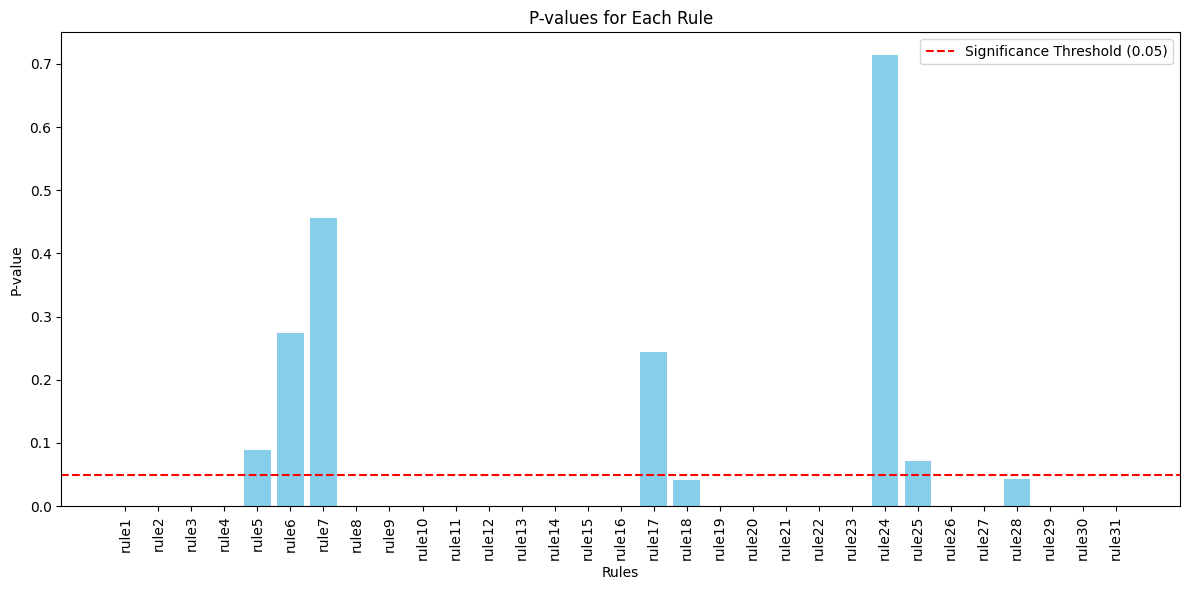

In [22]:
# グラフを作成
plt.figure(figsize=(12, 6))
plt.bar(results_df['Rule'], results_df['P-value'], color='skyblue')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.xlabel('Rules')
plt.ylabel('P-value')
plt.title('P-values for Each Rule')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

上位 - 下位

グラフが上にはみ出ているものは


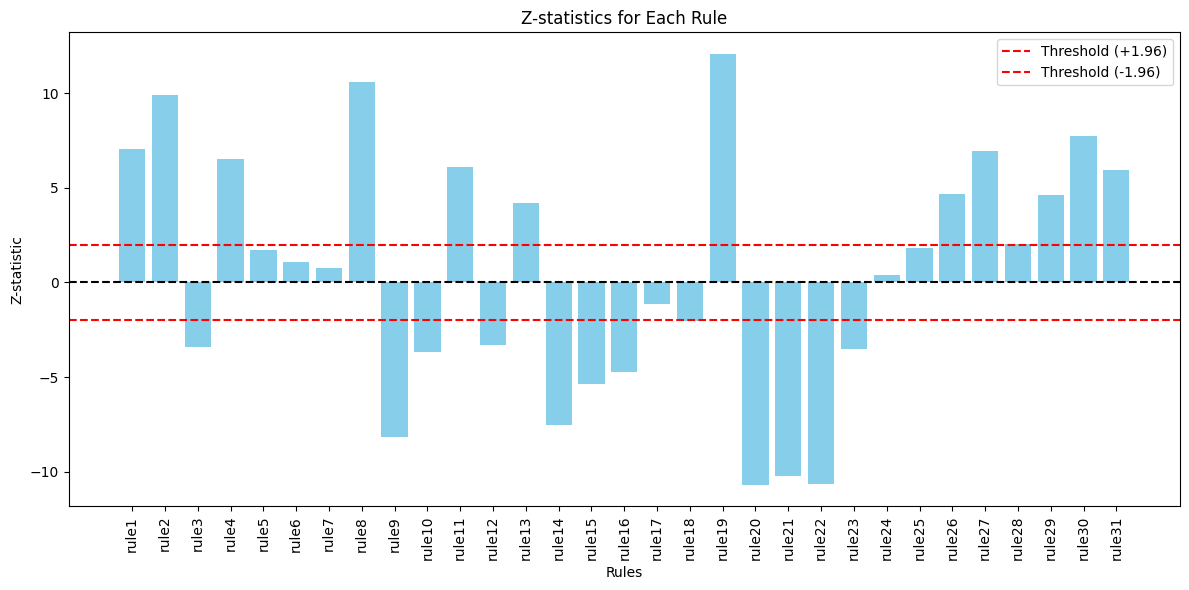

In [23]:
# グラフを作成
plt.figure(figsize=(12, 6))
plt.bar(results_df['Rule'], results_df['Z-statistic'], color='skyblue')  # Z統計量を棒グラフとして表示
plt.axhline(y=1.96, color='red', linestyle='--', label='Threshold (+1.96)')  # +1.96の基準線
plt.axhline(y=-1.96, color='red', linestyle='--', label='Threshold (-1.96)')  # -1.96の基準線
plt.axhline(y=0, color='black', linestyle='--')  # 中央線（0）
plt.xlabel('Rules')
plt.ylabel('Z-statistic')
plt.title('Z-statistics for Each Rule')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Z統計量の絶対値が1.96を超えるルールを抽出
significant_rules = results_df[results_df['Z-statistic'].abs() > 1.96]['Rule'].tolist()

# 結果を表示
print("絶対値が1.96を超えるルール:")
print(significant_rules)

print(f"絶対値が1.96を超えるルールの数: {len(significant_rules)}")


絶対値が1.96を超えるルール:
['rule1', 'rule2', 'rule3', 'rule4', 'rule8', 'rule9', 'rule10', 'rule11', 'rule12', 'rule13', 'rule14', 'rule15', 'rule16', 'rule18', 'rule19', 'rule20', 'rule21', 'rule22', 'rule23', 'rule26', 'rule27', 'rule28', 'rule29', 'rule30', 'rule31']
絶対値が1.96を超えるルールの数: 25


指標とグループごとの yes と答えた比率


In [25]:
# 結果を格納するリスト
ratios = []

# 各ルールについて比率を計算
for rule in rules:
    # yesの数をカウント
    high_yes = (high_df[rule] == 'yes').sum()
    low_yes = (low_df[rule] == 'yes').sum()

    # サンプルサイズを取得
    high_total = len(high_df)
    low_total = len(low_df)

    # 比率を計算
    high_ratio = high_yes / high_total
    low_ratio = low_yes / low_total

    # 結果をリストに追加
    ratios.append({'Rule': rule, 'High Ratio': high_ratio, 'Low Ratio': low_ratio})

# 結果をデータフレームに変換
ratios_df = pd.DataFrame(ratios)

# 結果を表示
print(ratios_df)


      Rule  High Ratio  Low Ratio
0    rule1       0.946      0.851
1    rule2       0.499      0.283
2    rule3       0.294      0.366
3    rule4       0.575      0.429
4    rule5       0.839      0.810
5    rule6       0.083      0.070
6    rule7       0.778      0.764
7    rule8       0.476      0.249
8    rule9       0.422      0.605
9   rule10       0.208      0.279
10  rule11       0.938      0.855
11  rule12       0.663      0.731
12  rule13       0.516      0.423
13  rule14       0.128      0.261
14  rule15       0.108      0.194
15  rule16       0.256      0.353
16  rule17       0.682      0.706
17  rule18       0.641      0.684
18  rule19       0.470      0.214
19  rule20       0.343      0.581
20  rule21       0.105      0.286
21  rule22       0.058      0.224
22  rule23       0.255      0.326
23  rule24       0.610      0.602
24  rule25       0.689      0.651
25  rule26       0.639      0.536
26  rule27       0.419      0.272
27  rule28       0.288      0.248
28  rule29    

# 以下テスト


In [6]:
# 分野とカテゴリを指定
fields = ["Physics", "Biochemistry_Molecular_Biology", "Chemistry", "Materials_Science", "Engineering"]
categories = ["high", "low"]

# 入力ファイルパスと出力ファイルパスのベースディレクトリ
input_dir = "../../data/results"


In [7]:
# データを格納する辞書を用意
dataframes = {}

# データの読み込み
for field in fields:
    for category in categories:
        # ファイルパスを生成
        file_path = os.path.join(input_dir, f"{field}_{category}1000.csv")
        
        # ファイルが存在するかを確認
        if os.path.exists(file_path):
            try:
                # データフレームを読み込む
                df = pd.read_csv(file_path, encoding="utf-8")
                key = f"{field}_{category}"
                dataframes[key] = df
                print(f"ファイル {file_path} を読み込みました。")
            except Exception as e:
                print(f"ファイル {file_path} の読み込み中にエラーが発生しました: {e}")
        else:
            print(f"ファイル {file_path} が存在しません。")


ファイル ../../data/results/Physics_high1000.csv が存在しません。
ファイル ../../data/results/Physics_low1000.csv が存在しません。
ファイル ../../data/results/Biochemistry_Molecular_Biology_high1000.csv が存在しません。
ファイル ../../data/results/Biochemistry_Molecular_Biology_low1000.csv が存在しません。
ファイル ../../data/results/Chemistry_high1000.csv が存在しません。
ファイル ../../data/results/Chemistry_low1000.csv が存在しません。
ファイル ../../data/results/Materials_Science_high1000.csv が存在しません。
ファイル ../../data/results/Materials_Science_low1000.csv が存在しません。
ファイル ../../data/results/Engineering_high1000.csv が存在しません。
ファイル ../../data/results/Engineering_low1000.csv が存在しません。


# データの前処理


In [8]:
# 変換対象のruleカラムのリストを定義
rule_columns = [f"rule{i}" for i in range(1, 35)]

# yes -> 1, no -> 0 の変換関数
def transform_rules(df, rule_cols):
    for col in rule_cols:
        if col in df.columns:
            df[col] = df[col].replace({'yes': 1, 'no': 0})
    return df

# 各データフレームに対して変換処理を実行
for key, df in dataframes.items():
    dataframes[key] = transform_rules(df, rule_columns)
    print(f"{key} のデータを変換しました。")

# 変換結果の確認
for key, df in dataframes.items():
    print(f"{key} データフレームの先頭5行:")
    print(df.head())


# データの確認


In [9]:
for key, df in dataframes.items():
    print(f"{key} データフレームの先頭5行:")
    print(df.head())